In [7]:
import networkx as nx
import matplotlib.pyplot as plt

In [17]:
# 对网络 G 进行可视化
def plot_graph(G):
  fig, ax = plt.subplots(figsize = (12, 8))
  # plt.figure()
  pos = nx.spring_layout(G)
  edges = G.edges()
  # nx.draw_networkx(G, pos, edges = edges)
  nx.draw_networkx_nodes(G, pos, nodelist = G.nodes(), node_size = 300, node_color = 'r', alpha = 0.8)
  nx.draw_networkx_edges(G, pos, edgelist = edges, alpha = 0.4)
  nx.draw_networkx_labels(G, pos, font_size = 10, ax = ax)
  plt.show()

In [18]:
path = '/Volumes/Library/SynologyDrive/data/AI_Cheats/'

In [19]:
# 数据加载，构造图
G = nx.read_gml(path + '/LPA/football.gml')

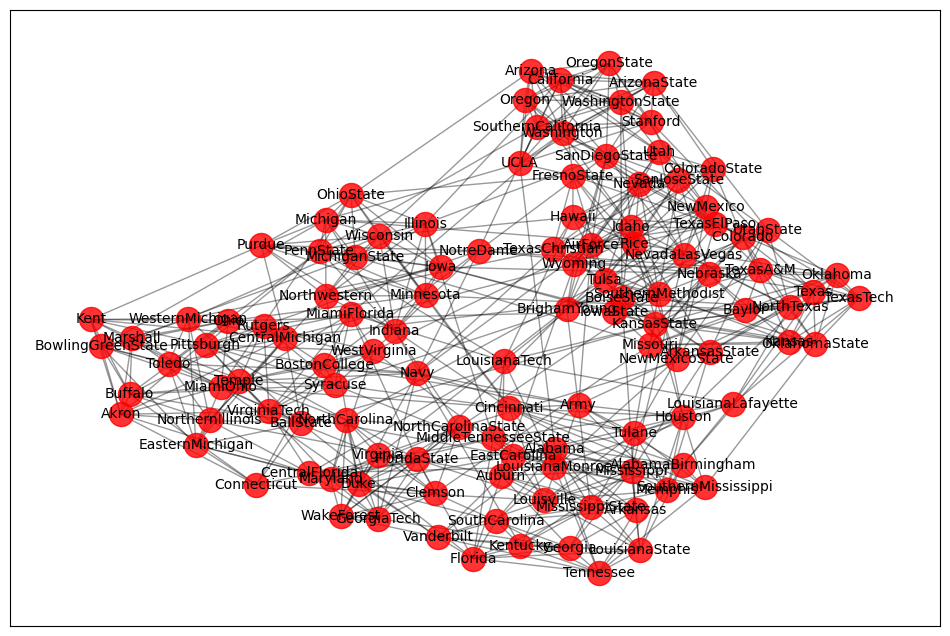

['BrighamYoung', 'FloridaState', 'Iowa', 'KansasState', 'NewMexico', 'TexasTech', 'PennState', 'SouthernCalifornia', 'ArizonaState', 'SanDiegoState', 'Baylor', 'NorthTexas', 'NorthernIllinois', 'Northwestern', 'WesternMichigan', 'Wisconsin', 'Wyoming', 'Auburn', 'Akron', 'VirginiaTech', 'Alabama', 'UCLA', 'Arizona', 'Utah', 'ArkansasState', 'NorthCarolinaState', 'BallState', 'Florida', 'BoiseState', 'BostonCollege', 'WestVirginia', 'BowlingGreenState', 'Michigan', 'Virginia', 'Buffalo', 'Syracuse', 'CentralFlorida', 'GeorgiaTech', 'CentralMichigan', 'Purdue', 'Colorado', 'ColoradoState', 'Connecticut', 'EasternMichigan', 'EastCarolina', 'Duke', 'FresnoState', 'OhioState', 'Houston', 'Rice', 'Idaho', 'Washington', 'Kansas', 'SouthernMethodist', 'Kent', 'Pittsburgh', 'Kentucky', 'Louisville', 'LouisianaTech', 'LouisianaMonroe', 'Minnesota', 'MiamiOhio', 'Vanderbilt', 'MiddleTennesseeState', 'Illinois', 'MississippiState', 'Memphis', 'Nevada', 'Oregon', 'NewMexicoState', 'SouthCarolina', 

In [20]:
# 可视化
plot_graph(G)
print(list(G.nodes()))
print(G.nodes['BrighamYoung']['value'])